<a href="https://colab.research.google.com/github/my3sheth/Personal-Projects/blob/main/IMDb_Top_1%2C000_Movies_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**INTRODUCTION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
data=pd.read_csv('/content/IMDB Movies copy.csv')

In [ ]:
data.head()

,Title,Year_of_Release,Certificate,Runtime,Genre,Rating,Overview,Meta_Score,Director,Star_1,Star_2,Star_3,Star_4,Total_Votes,Revenue
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,Crime,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


###**MODULE 1**

In [ ]:
data.describe()

,Year_of_Release,Runtime,Rating,Meta_Score,Total_Votes,Revenue
count,1000.000000,1000.000000,1000.000000,843.000000,1.000000e+03,1.000000e+03
mean,1991.221000,122.891000,7.949300,77.971530,2.736929e+05,6.245165e+07
std,23.285669,28.093671,0.275491,12.376099,3.273727e+05,1.051148e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,70.000000,5.552625e+04,2.351568e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.385485e+05,1.791714e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.741612e+05,7.410387e+07
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1000 non-null   object 
 1   Year_of_Release  1000 non-null   int64  
 2   Certificate      1000 non-null   object 
 3   Runtime          1000 non-null   int64  
 4   Genre            1000 non-null   object 
 5   Rating           1000 non-null   float64
 6   Overview         1000 non-null   object 
 7   Meta_Score       843 non-null    float64
 8   Director         1000 non-null   object 
 9   Star_1           1000 non-null   object 
 10  Star_2           1000 non-null   object 
 11  Star_3           1000 non-null   object 
 12  Star_4           1000 non-null   object 
 13  Total_Votes      1000 non-null   int64  
 14  Revenue          1000 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 117.3+ KB


In [ ]:
data = data.dropna(subset=['Revenue'])

In [ ]:
data['Meta_Score'].fillna(data['Meta_Score'].mean(), inplace=True)

<ipython-input-8-a06e893e66f6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Meta_Score'].fillna(data['Meta_Score'].mean(), inplace=True)


In [ ]:
features = ['Year_of_Release', 'Certificate', 'Runtime', 'Genre', 'Rating', 'Meta_Score',
            'Director', 'Star_1', 'Star_2', 'Star_3', 'Star_4', 'Total_Votes']
X = data[features]
y = data['Revenue']

In [ ]:
categorical_cols = ['Certificate', 'Genre', 'Director', 'Star_1', 'Star_2', 'Star_3', 'Star_4']
numerical_cols = ['Year_of_Release', 'Runtime', 'Rating', 'Meta_Score', 'Total_Votes']

###**MODULE 2**

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

###**MODULE 3**

In [ ]:
model_scores = {}

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000)
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    model_scores[name] = score
    print(f"{name} R² Score: {score:.4f}")

Linear Regression R² Score: 0.4066
Decision Tree R² Score: 0.2945
Random Forest R² Score: 0.4765
KNN R² Score: 0.4047
SVR R² Score: -0.1597
XGBoost R² Score: 0.5028
MLP Regressor R² Score: -0.3061


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


###**MODULE 4**

In [ ]:
ann = Sequential()
ann.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
ann.add(Dense(units=64, activation='relu'))
ann.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann.compile(optimizer='adam', loss='mean_squared_error')
history = ann.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [ ]:
y_pred_ann = ann.predict(X_test)
ann_score = r2_score(y_test, y_pred_ann)
model_scores["Artificial Neural Network"] = ann_score
print(f"Artificial Neural Network R² Score: {ann_score:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Artificial Neural Network R² Score: -0.3001


In [ ]:
best_model = max(model_scores, key=model_scores.get)
print(f"\nBest Performing Model: {best_model} with R² Score: {model_scores[best_model]:.4f}")


Best Performing Model: XGBoost with R² Score: 0.5028


###**MODULE 5**

In [ ]:
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, mae, rmse

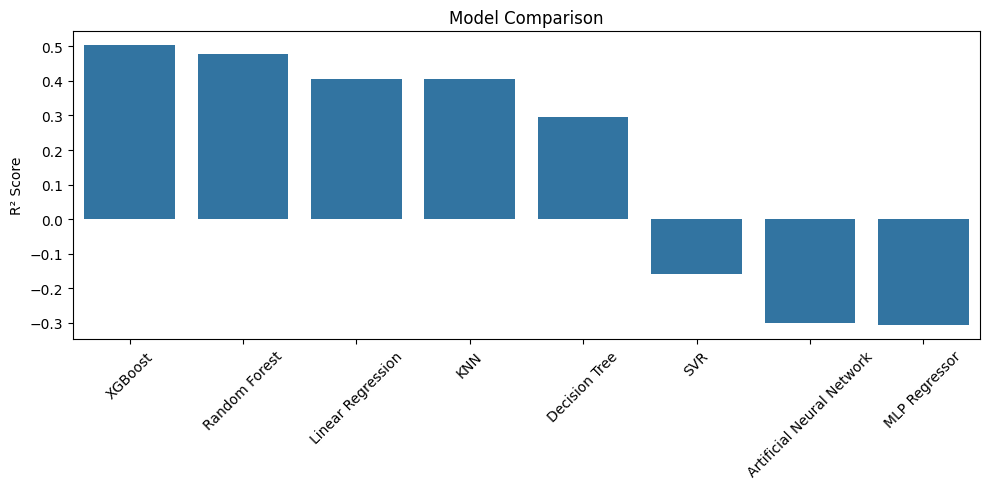

In [ ]:
# Optional: Sort models by R²
sorted_models = dict(sorted(model_scores.items(), key=lambda item: item[1], reverse=True))

# Plot model performance
def plot_model_scores(scores):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(scores.keys()), y=list(scores.values()))
    plt.xticks(rotation=45)
    plt.ylabel("R² Score")
    plt.title("Model Comparison")
    plt.tight_layout()

plot_model_scores(sorted_models)

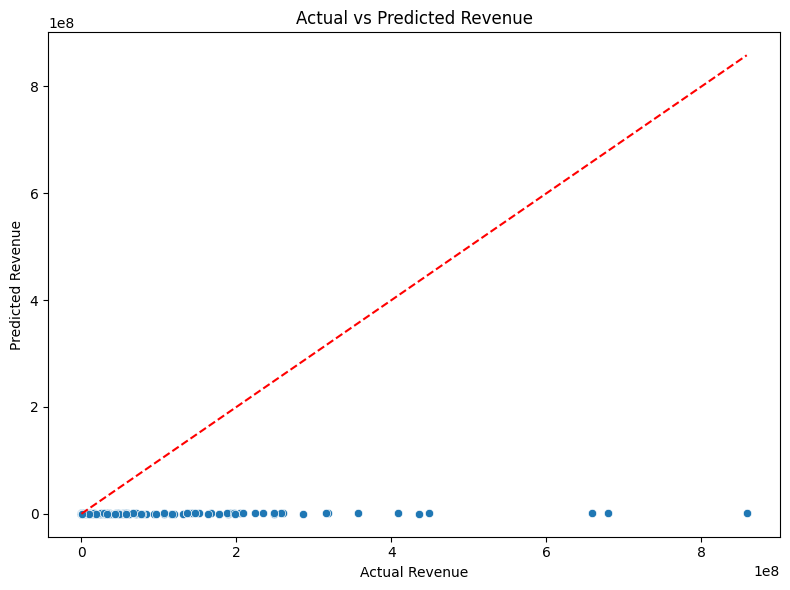

In [ ]:
def plot_actual_vs_predicted(y_true, y_pred, title="Actual vs Predicted Revenue"):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.xlabel("Actual Revenue")
    plt.ylabel("Predicted Revenue")
    plt.title(title)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_test, y_pred_ann.ravel(), "Actual vs Predicted Revenue")

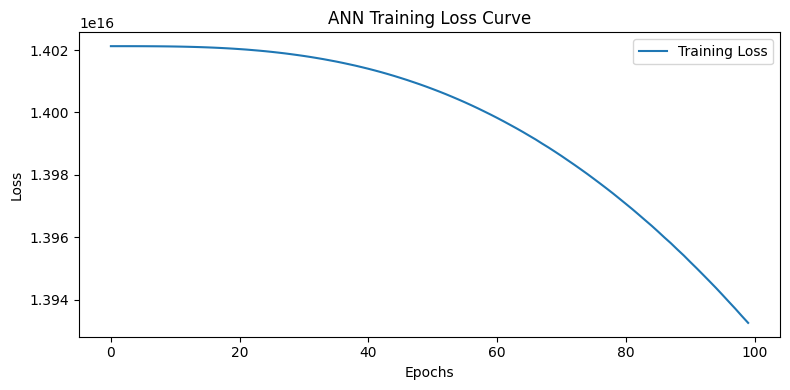

In [ ]:
def plot_ann_loss(history):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("ANN Training Loss Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_ann_loss(history)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, mae, rmse

def show_evaluation_table(y_true, y_pred, model_name):
    r2, mae, rmse = evaluate_model(y_true, y_pred)
    print(f"{model_name} Evaluation")
    print({
        "R² Score": round(r2, 4),
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2)
    })

show_evaluation_table(y_test, y_pred_ann.ravel(), "Artificial Neural Network")

Artificial Neural Network Evaluation
{'R² Score': -0.3001, 'MAE': 65654528.0, 'RMSE': np.float64(136084442.76)}
